In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

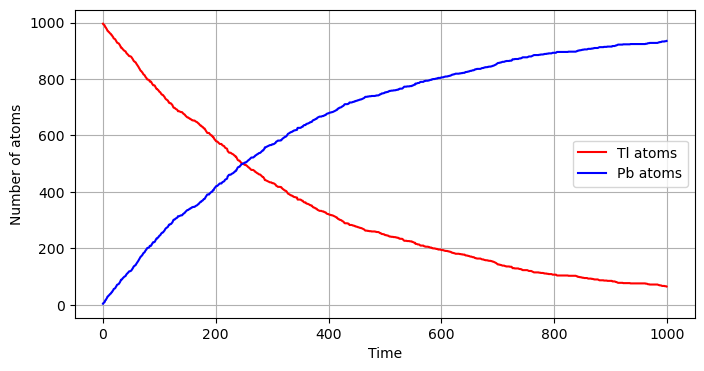

In [2]:
# Parameters
half_life = 3.052 * 60  
tau = half_life / np.log(2)  
time_steps = 1000 

# Initialization
Tl_atoms = 1000  
Pb_atoms = 0  
Tl_evolution = []   
Pb_evolution = []  
time = np.arange(time_steps)  

for t in time:
    p_decay = 1 - 2**(-1/tau)
    decayed_atoms = np.random.binomial(Tl_atoms, p_decay)
    Tl_atoms -= decayed_atoms
    Pb_atoms += decayed_atoms
    Tl_evolution.append(Tl_atoms)
    Pb_evolution.append(Pb_atoms)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
ax.plot(time, Tl_evolution, c='r', label='Tl atoms')
ax.plot(time, Pb_evolution, c='b', label='Pb atoms')
ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
plt.grid()
plt.legend()
plt.show()

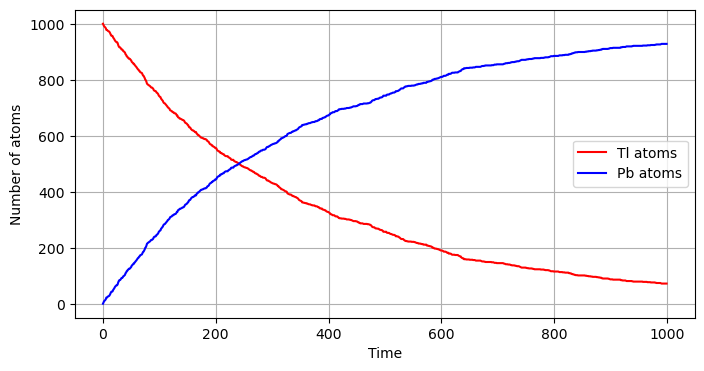

In [5]:
# Parameters
half_life = 3.052 * 60  
tau = half_life / np.log(2)  
n_Tlatoms = 1000

# Generate random decay times using the inverse transform method
u = np.random.uniform(0, 1, size=n_Tlatoms) 
decay_times = -tau * np.log(1 - u) / np.log(2) # Inverse CDF
decay_times.sort()

# Count the number of atoms not yet decayed at each time step
time = np.arange(0, 1000) 
remaining_atoms = np.array([np.sum(decay_times > t) for t in time])

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time, remaining_atoms, c='r', label='Tl atoms')
ax.plot(time, n_Tlatoms-remaining_atoms, c='b', label='Pb atoms')
ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
ax.legend()
ax.grid()
plt.show() 

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [109]:
import numpy as np

# Parameters
Z = 79  
e = 1.602e-19  
epsilon_0 = 8.854e-12  
E = 7.7 * 10**6 * e  
a0 = 5.29177e-11  
sigma = a0 / 100  

b_max = (Z * e**2) / (2 * np.pi * epsilon_0 * E)

# Impact parameter
n_particles = 1000000
z = np.random.uniform(0, 1, n_particles)  
b = np.sqrt(-2 * sigma**2 * np.log(1 - z))

# Compute number of particle that bounce back
n_bounce = np.sum(b < b_max)
fraction_bounce = n_bounce / n_particles

print(f"Fraction of particles that bounce back: {fraction_bounce:.4f}")

Fraction of particles that bounce back: 0.0016


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [2]:
def func(x):
    return (np.sin(1 / (x*(2-x))))**2

In [3]:
# Hit / miss method
N = 100000
count = 0
a = 0 
b = 2

for i in range(N):
    x = a + (b-a)*np.random.random()
    y = np.random.random()
    if y < func(x) :
        count += 1
        
I = (b - a) * count / N
p = count / N 
sigma = (b - a) * np.sqrt(p * (1 - p) / N)

print(f"I = {I:.5f} ± {sigma:.5f}")

I = 1.45474 ± 0.00282


In [4]:
# Mean value method
x = a + (b - a) * np.random.random(N)  
y = func(x)

I = (b - a) * np.mean(y)  
sigma = (b - a) * np.std(y) / np.sqrt(N)

print(f"I = {I:.5f} ± {sigma:.5f}")

I = 1.45292 ± 0.00167


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
def circle(x, y, r):
    return x**2 + y**2 <= r**2

In [6]:
# Circle
r = 1
N = 1000000

x = np.random.uniform(-r, r, N)
y = np.random.uniform(-r, r, N)

z = circle(x, y, r)
I = z.mean() * (2*r)**2

print(I)

3.141876


In [7]:
def D_sphere(N, dim, r):
    x = np.random.uniform(-r, r, size=(N, dim))
    z = np.sum(x**2, axis=1) <= r**2
    return z

In [9]:
# Sphere 10D
r = 1
N = 1000000
dim = 10

hypercube = (2*r)**dim
z = D_sphere(N, dim, r)
I = z.mean() * hypercube
print(I)

2.547712


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [151]:
# PDF : w = sqrt(1/x)
# CDF : u = 2 sqrt(x)
# INV_CDF : x = (u/2)^2

def f(x):
    return x**(-0.5) / (np.exp(x) + 1)

def w(x):
    return np.sqrt(1 / x) / 2 # w(x) must be normalized over the integration domain 

def I_CDF(u):
    return (u)**2  

In [152]:
a, b = 0, 1
N = 1000000

int_w, _= quad(w, a, b)  

# Importance sampling
u = np.random.uniform(0, 1, N)
x_i = I_CDF(u)  

f_values = f(x_i) / w(x_i)
I = np.mean(f_values) * int_w

print(f"Monte Carlo estimate of the integral: {I}")


Monte Carlo estimate of the integral: 0.838815670724456
